# Exploratory Data Analysis

Use this notebook to inspect raw data, check quality, and prototype features.

## Outline
- Setup and data loading
- Exploratory data analysis (schema, distributions, correlations)
- Data preparation and feature engineering
- Modeling prototypes (baseline, overfitting check, neural network)


## 1. Setup and Data Loading

Imports, display settings, and loading the raw CSV into a DataFrame.


In [18]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

# TODO: set your raw data path
raw_path = '../data/raw/278k_song_labelled.csv'

df = pd.read_csv(raw_path)
df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [19]:
# Drop the useless column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)


In [20]:
# Check quick information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


In [21]:
# Check the number of columns
df.columns


Index(['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'labels'],
      dtype='object')

## 2.1 Exploratory Data Analysis (EDA)

In this stage, Exploratory Data Analysis (EDA) is conducted to gain a comprehensive understanding of the structure, characteristics, and quality of the Spotify dataset before building the classification models. The EDA process includes examining the data schema, performing descriptive statistics, analyzing variable distributions, identifying missing values and potential outliers, and visualizing relationships among variables.

### Feature Description

The dataset consists of audio features extracted from Spotify, which capture various musical and acoustic characteristics of each track:

- **duration_ms**: Duration of the track in milliseconds.
- **danceability**: A measure of how suitable a track is for dancing, based on tempo, rhythm stability, and beat strength.
- **energy**: A measure of intensity and activity, representing how energetic a track feels.
- **loudness**: The overall loudness of a track, measured in decibels (dB).
- **speechiness**: The presence of spoken words in a track.
- **acousticness**: The likelihood that a track is acoustic.
- **instrumentalness**: The likelihood that a track contains no vocals.
- **liveness**: The probability that the track was recorded during a live performance.
- **valence**: A measure of the musical positivity conveyed by a track.
- **tempo**: The estimated tempo of a track in beats per minute (BPM).
- **spec_rate**: Spectral rate feature extracted during audio signal processing.


In [22]:
y = df['labels']
X = df.drop('labels', axis=1)
print(y.head())
print(X.head())

0    2
1    1
2    1
3    0
4    1
Name: labels, dtype: int64
   duration (ms)  danceability  energy  loudness  speechiness  acousticness  \
0       195000.0         0.611   0.614    -8.815       0.0672        0.0169   
1       194641.0         0.638   0.781    -6.848       0.0285        0.0118   
2       217573.0         0.560   0.810    -8.029       0.0872        0.0071   
3       443478.0         0.525   0.699    -4.571       0.0353        0.0178   
4       225862.0         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  
0          0.000794    0.7530    0.520  128.050  3.446154e-07  
1          0.009530    0.3490    0.250  122.985  1.464234e-07  
2          0.000008    0.2410    0.247  170.044  4.007850e-07  
3          0.000088    0.0888    0.199   92.011  7.959809e-08  
4          0.000001    0.0965    0.163  115.917  4.693131e-07  


In [23]:
# Statiscal description of data
X.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05


### Distribution Analysis and Outliers
- Most audio features are normalized to [0,1], except loudness (log-scaled in dB).
- Several features (e.g., speechiness, instrumentalness, liveness) exhibit zero-inflated and right-skewed distributions.
- High values in speechiness and liveness are rare but valid, reflecting spoken-word and live recordings.
- Instrumentalness shows a strong mass at zero, consistent with the dominance of vocal tracks.


In [24]:
# Check null values
X.isnull().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
dtype: int64

labels
1    106429
0     82058
2     47065
3     42386
Name: count, dtype: int64


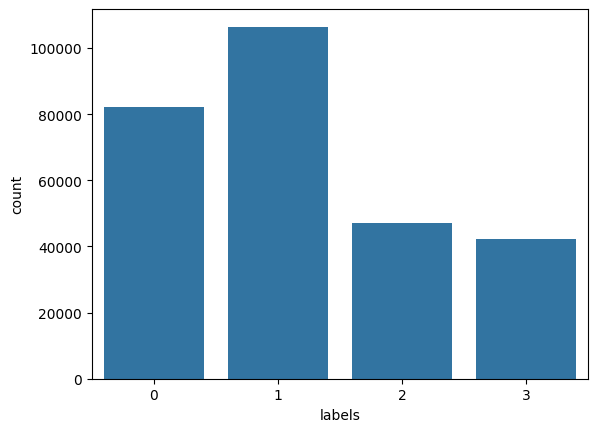

In [25]:
print(y.value_counts())
sns.countplot(x=y)
plt.show()

### Label Distribution Notes

The label distribution indicates a moderately imbalanced multi-class dataset, with the ?happy? class having the highest number of samples, 
while ?energetic? and ?calm? are underrepresented. Due to this class imbalance, accuracy alone is not a sufficient evaluation metric. 
Therefore, additional metrics such as precision, recall,and F1-score (especially macro-averaged F1) are more appropriate for evaluating model performance.


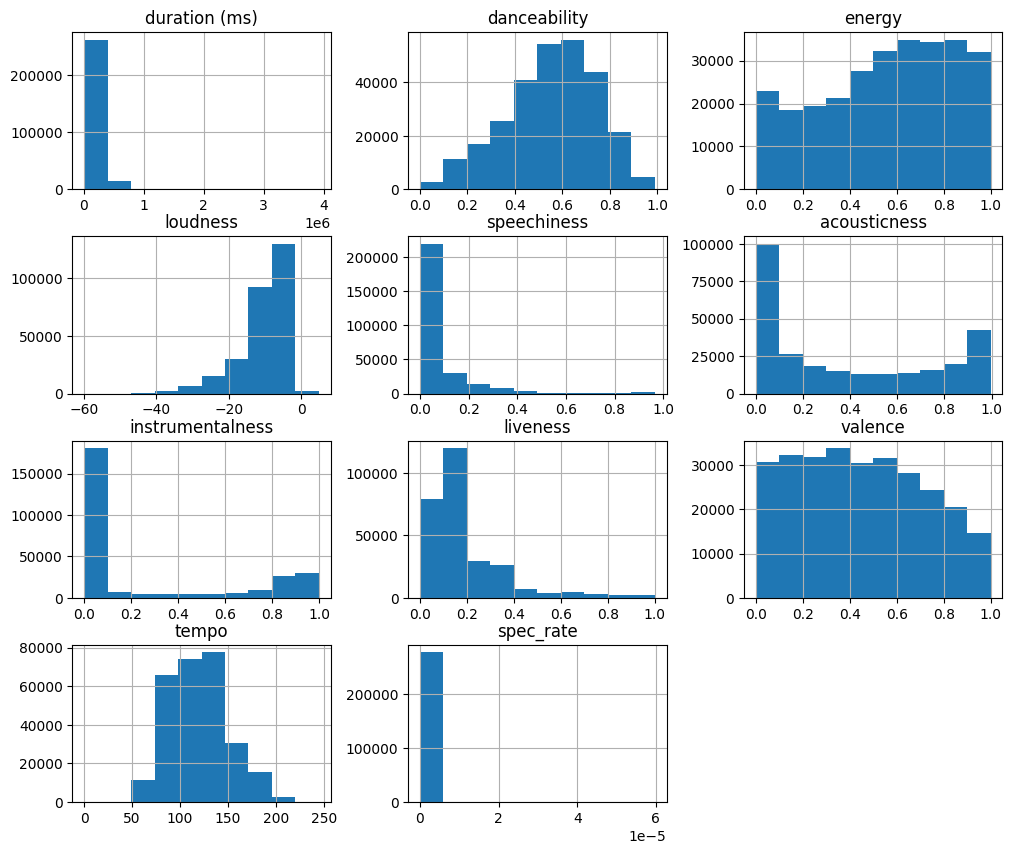

In [26]:
X.hist(figsize=(12, 10))
plt.show()

### Feature Distribution Notes
- Duration_ms shows a strongly right-skewed distribution, indicating that most tracks have moderate lengths while a small number of tracks are significantly longer.
- Danceability exhibits a relatively symmetric distribution centered around mid-range values, suggesting balanced variation in rhythmic suitability across tracks.
- Energy is slightly left-skewed with values concentrated at higher levels, reflecting that many tracks in the dataset are perceived as energetic.
- Loudness follows a left-skewed distribution consistent with decibel scaling and contains valid extreme values corresponding to quieter tracks.
- Speechiness shows a highly right-skewed distribution with a long tail, indicating that most tracks contain minimal spoken content.
- Acousticness displays a wide and bimodal-like distribution, suggesting a mixture of highly acoustic and highly electronic tracks.
- Instrumentalness is zero-inflated, with most tracks containing vocals and a smaller subset being purely instrumental.
- Liveness is right-skewed, reflecting the dominance of studio recordings over live performances.
- Valence exhibits a broad and relatively uniform distribution, indicating diverse emotional tones across the dataset.
- Tempo follows an approximately normal distribution centered around common popular music tempos.
- Spec_rate shows a highly right-skewed distribution with values concentrated near zero, suggesting the need for careful scaling during preprocessing.


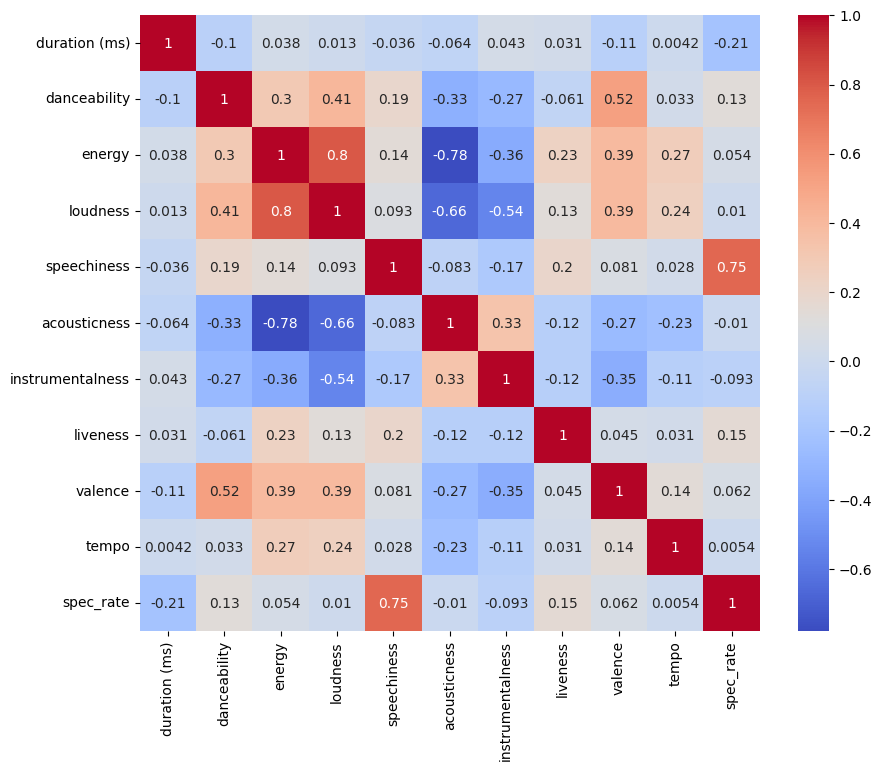

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

### Correlation Insights
- The correlation analysis reveals several meaningful relationships among audio features.
- Energy and loudness exhibit a strong positive correlation, reflecting their shared association with perceived intensity. 
- Acousticness shows strong negative correlation with energy and loudness, indicating that highly acoustic tracks tend to be less intense.
- Danceability and valence are moderately correlated, suggesting a relationship between rhythmic suitability and emotional positivity.
- Most other feature pairs display low correlations, indicating limited multicollinearity and suggesting that many features may provide complementary information for modeling.


In [28]:
# Remove the duration and spec_rate columns.
X = X.drop('duration (ms)', axis=1)
X = X.drop('spec_rate', axis=1)


In [29]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917


In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import nbformat
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

features = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

# ensure y is categorical for x-axis
y_cat = pd.Series(y).astype(str)

rows, cols = 3, 3
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"<i>{f}</i>" for f in features]
)

for i, feat in enumerate(features):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(name=feat, x=y_cat, y=X[feat]),
        row=r, col=c
    )

fig.update_layout(
    height=900,
    width=900,
    title_text="<b>Feature Distributions Across Labels</b>",
    title_x=0.5,
    showlegend=False
)

pio.renderers.default = "browser"
fig.show()

### Boxplot Insights by Label

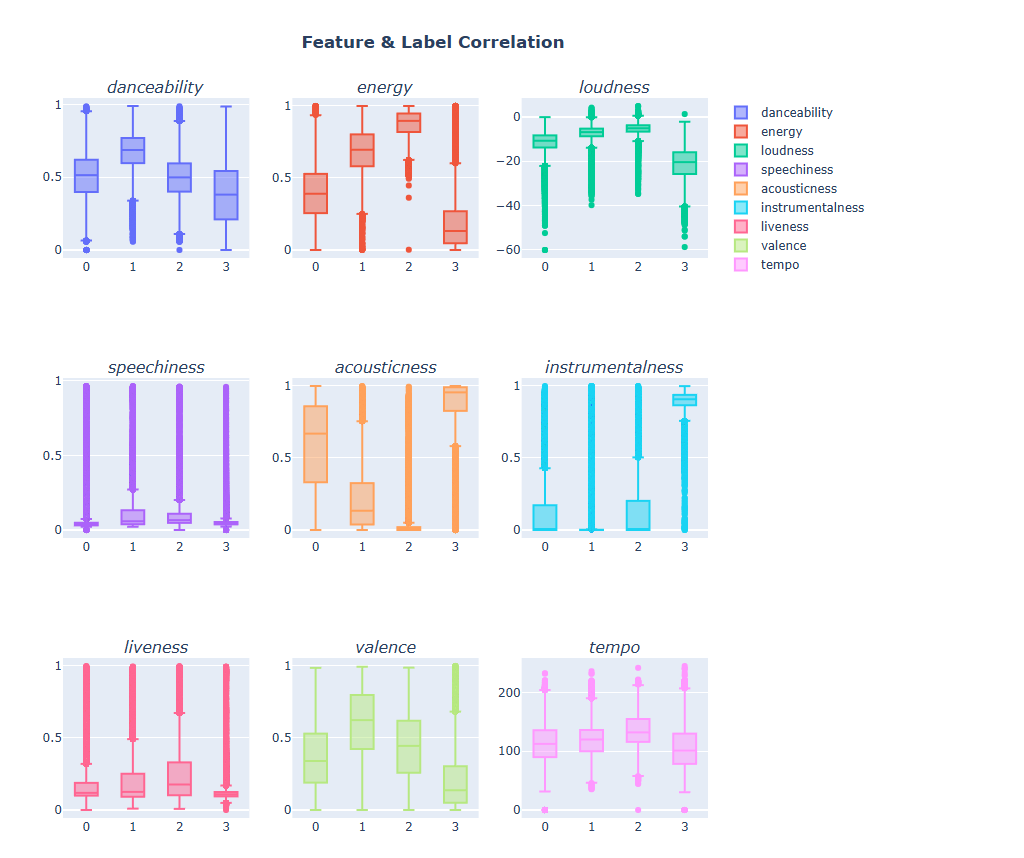
- The boxplots reveal clear distributional differences across mood labels for several audio features.
- Energy, loudness, valence, danceability, and acousticness exhibit strong median shifts, indicating high discriminative potential. 
- Instrumentalness and tempo also show meaningful label-dependent patterns, particularly for calm and energetic moods. 
- In contrast, speechiness and liveness display substantial overlap across labels, suggesting weaker standalone predictive power but potential complementary value when combined with other features.


## 2.2 Data Preparation & Feature Engineering

- The dataset contains no missing values, and zero values were verified as valid domain-specific measurements, therefore, no imputation was required.
- All input features are numerical Spotify audio descriptors, so no categorical encoding was applied. 
- Due to differences in feature scales, StandardScaler was used after the train-validation split to prevent data leakage. 
- Limited, domain-driven feature engineering was performed on skewed features to improve model stability while preserving interpretability.


## 3. Modeling Prototypes

Quick baselines and diagnostics to validate feature choices and data prep.


In [34]:
import sys
!"{sys.executable}" -m pip install -U scikit-learn

### Baseline: Logistic Regression + Feature Engineering

Adds domain features, scales inputs, and reports Macro F1 with a classification report.


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# =========================
# 1) Select features + target
# =========================
feature_cols = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "spec_rate"
]

X = df[feature_cols].copy()
y = df["labels"].copy()

# Safety check
assert len(X) == len(y), "X and y lengths do not match."


# =========================
# 2) Train/Validation split (avoid leakage)
# =========================
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


# =========================
# 3) Feature engineering (domain-driven)
# =========================
def add_features(X_in):
    # FunctionTransformer may pass numpy arrays in some setups.
    # Ensure we always work with a DataFrame and keep column names.
    if not isinstance(X_in, pd.DataFrame):
        X_in = pd.DataFrame(X_in, columns=feature_cols)

    X_ = X_in.copy()

    # loudness is negative; "louder" tracks are closer to 0
    X_["intensity"] = X_["energy"] * (-X_["loudness"])

    # rhythmic drive: tempo + danceability interaction
    X_["rhythm_drive"] = X_["danceability"] * X_["tempo"]

    # calmness proxy: acoustic + instrumental
    X_["calm_score"] = X_["acousticness"] + X_["instrumentalness"]

    return X_

feat_eng = FunctionTransformer(add_features, validate=False)


# =========================
# 4) Model pipeline (feature eng -> scale -> multiclass classifier)
# =========================
base_lr = LogisticRegression(
    solver="liblinear",          # very compatible across sklearn versions
    class_weight="balanced",
    max_iter=2000
)

pipe = Pipeline([
    ("feat_eng", feat_eng),
    ("scaler", StandardScaler()),
    ("model", OneVsRestClassifier(base_lr))
])


# =========================
# 5) Train + Evaluate
# =========================
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

print("Macro F1:", f1_score(y_val, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Macro F1: 0.8145295632743159

Classification Report:
               precision    recall  f1-score   support

           0     0.8431    0.7541    0.7961     16412
           1     0.8247    0.7704    0.7966     21286
           2     0.6936    0.8291    0.7553      9413
           3     0.8498    0.9796    0.9101      8477

    accuracy                         0.8074     55588
   macro avg     0.8028    0.8333    0.8145     55588
weighted avg     0.8117    0.8074    0.8068     55588

Confusion Matrix:
 [[12376  1951   861  1224]
 [ 2093 16399  2574   220]
 [   85  1500  7804    24]
 [  126    35    12  8304]]


### Overfitting Check: Tree-Based Models

Compares RandomForest, XGBoost, and LightGBM using train vs validation Macro F1.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3568
[LightGBM] [Info] Number of data points in the train set: 222350, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
          model  train_macro_f1  val_macro_f1  gap(train-val)
0      LightGBM        0.999995      0.971538        0.028457
1       XGBoost        0.990047      0.967796        0.022251
2  RandomForest        1.000000      0.936378        0.063622


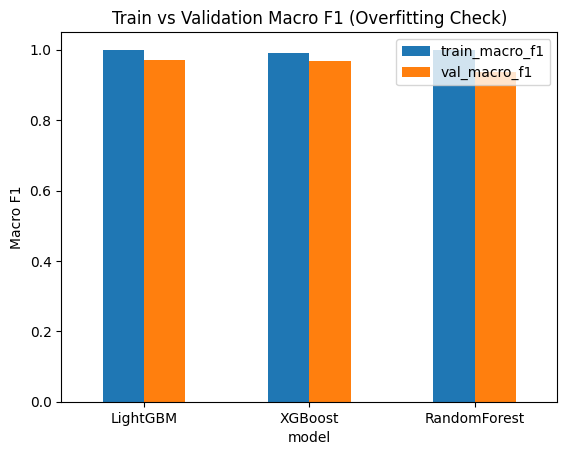

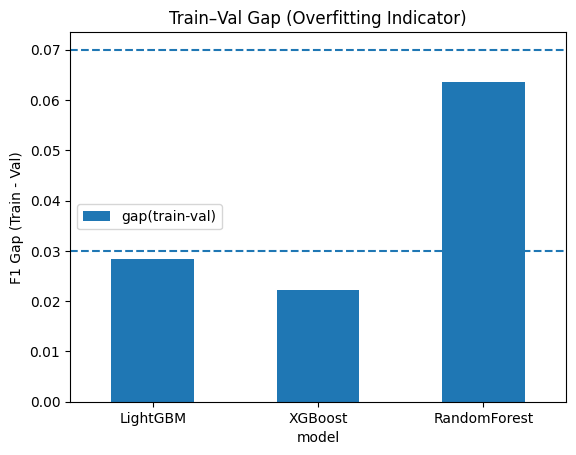

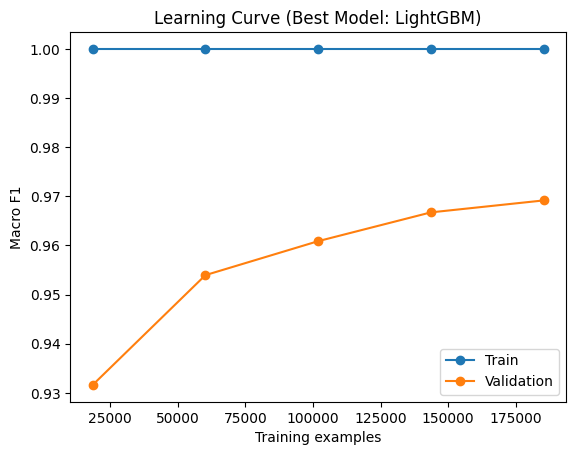

In [ ]:
# ============================================================
# FULL CODE: Overfitting check with TABLE + PLOTS
# - Trains each model (RF / XGB / LGBM) on X_train
# - Computes Train vs Val Macro-F1 and Gap
# - Shows a summary table
# - Plots (1) Train vs Val bar chart, (2) Gap bar chart
# - Optional: Learning curve for the best model
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


# -------------------------
# 0) Prepare X, y
# -------------------------
feature_cols = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "spec_rate"
]

X = df[feature_cols].copy()
y = df["labels"].astype(int).copy()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# sample_weight (balanced)
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_map = {c: w for c, w in zip(classes, cw)}
train_sample_weight = y_train.map(class_weight_map).to_numpy()


# -------------------------
# 1) Feature engineering
# -------------------------
def add_features(X_in):
    X_ = X_in.copy()
    X_["intensity"] = X_["energy"] * (-X_["loudness"])
    X_["rhythm_drive"] = X_["danceability"] * X_["tempo"]
    X_["calm_score"] = X_["acousticness"] + X_["instrumentalness"]
    return X_

feat_eng = FunctionTransformer(add_features, validate=False)


# -------------------------
# 2) Build models dict
# -------------------------
models = {}

# RandomForest
models["RandomForest"] = Pipeline([
    ("feat_eng", feat_eng),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=42,
        class_weight="balanced_subsample"
    ))
])

# XGBoost
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = Pipeline([
        ("feat_eng", feat_eng),
        ("model", XGBClassifier(
            n_estimators=800,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            objective="multi:softprob",
            num_class=len(classes),
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1
        ))
    ])
except Exception as e:
    print("XGBoost not available:", repr(e))

# LightGBM
try:
    from lightgbm import LGBMClassifier
    models["LightGBM"] = Pipeline([
        ("feat_eng", feat_eng),
        ("model", LGBMClassifier(
            n_estimators=1500,
            learning_rate=0.03,
            num_leaves=63,
            subsample=0.9,
            colsample_bytree=0.9,
            objective="multiclass",
            random_state=42,
            n_jobs=-1
        ))
    ])
except Exception as e:
    print("LightGBM not available:", repr(e))


# -------------------------
# 3) Train vs Val Macro-F1 table
# -------------------------
rows = []

for name, pipe in models.items():
    fit_kwargs = {}
    # use sample_weight where supported
    if name in ["RandomForest", "XGBoost", "LightGBM"]:
        fit_kwargs = {"model__sample_weight": train_sample_weight}

    pipe.fit(X_train, y_train, **fit_kwargs)

    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)

    train_f1 = f1_score(y_train, y_train_pred, average="macro")
    val_f1 = f1_score(y_val, y_val_pred, average="macro")
    gap = train_f1 - val_f1

    rows.append({
        "model": name,
        "train_macro_f1": train_f1,
        "val_macro_f1": val_f1,
        "gap(train-val)": gap
    })

result_df = pd.DataFrame(rows).sort_values("val_macro_f1", ascending=False).reset_index(drop=True)
print(result_df)


# -------------------------
# 4) Plot: Train vs Val bar chart
# -------------------------
plot_df = result_df.set_index("model")[["train_macro_f1", "val_macro_f1"]]
ax = plot_df.plot(kind="bar")
plt.ylabel("Macro F1")
plt.title("Train vs Validation Macro F1 (Overfitting Check)")
plt.xticks(rotation=0)
plt.show()

# -------------------------
# 5) Plot: Gap bar chart + thresholds
# -------------------------
gap_df = result_df.set_index("model")[["gap(train-val)"]]
ax = gap_df.plot(kind="bar")
plt.axhline(0.03, linestyle="--")  # mild overfit threshold
plt.axhline(0.07, linestyle="--")  # strong overfit threshold
plt.ylabel("F1 Gap (Train - Val)")
plt.title("Train–Val Gap (Overfitting Indicator)")
plt.xticks(rotation=0)
plt.show()


# -------------------------
# 6) OPTIONAL: Learning curve for the best model
# -------------------------
BEST_MODEL_NAME = result_df.loc[0, "model"]
best_pipe = models[BEST_MODEL_NAME]

train_sizes, train_scores, val_scores = learning_curve(
    best_pipe, X, y,
    cv=3,
    scoring="f1_macro",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, marker="o", label="Train")
plt.plot(train_sizes, val_mean, marker="o", label="Validation")
plt.xlabel("Training examples")
plt.ylabel("Macro F1")
plt.title(f"Learning Curve (Best Model: {BEST_MODEL_NAME})")
plt.legend()
plt.show()


### Neural Network: PyTorch MLP

A simple MLP with class-weighted loss, optional feature engineering, and validation reporting.


In [42]:
# ============================================================
# FULL CODE: Spotify Mood Multi-class NN (PyTorch MLP)
# - Uses train/val split (stratified)
# - Optional domain feature engineering (intensity, rhythm_drive, calm_score)
# - StandardScaler (fit on train only -> no leakage)
# - Class-weighted CrossEntropyLoss (handles imbalance)
# - Reports Macro F1 + classification report + confusion matrix
# ============================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


# -------------------------
# 0) CONFIG
# -------------------------
USE_FEATURE_ENGINEERING = True
RANDOM_STATE = 42
BATCH_SIZE = 1024
VAL_BATCH_SIZE = 4096
EPOCHS = 25
LR = 1e-3
WEIGHT_DECAY = 1e-4

# Your base feature columns (keep duration + spec_rate; they helped performance)
BASE_FEATURES = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "spec_rate"
]

TARGET_COL = "labels"


# -------------------------
# 1) BUILD DATA (X, y)
# -------------------------
assert TARGET_COL in df.columns, f"df must contain '{TARGET_COL}'"
for c in BASE_FEATURES:
    assert c in df.columns, f"Missing feature column in df: {c}"

X = df[BASE_FEATURES].copy()
y = df[TARGET_COL].astype(int).copy()

# Optional: add domain-driven engineered features
if USE_FEATURE_ENGINEERING:
    # loudness is negative; -loudness becomes a positive "loudness magnitude"
    X["intensity"] = X["energy"] * (-X["loudness"])
    X["rhythm_drive"] = X["danceability"] * X["tempo"]
    X["calm_score"] = X["acousticness"] + X["instrumentalness"]

# Train/Val split (STRATIFIED!)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

# -------------------------
# 2) SCALE (fit on train only -> no leakage)
# -------------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

# -------------------------
# 3) TORCH TENSORS + LOADERS
# -------------------------
X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)

X_val_t = torch.tensor(X_val_s, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.long)

train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=False
)

val_loader = DataLoader(
    TensorDataset(X_val_t, y_val_t),
    batch_size=VAL_BATCH_SIZE,
    shuffle=False,
    drop_last=False
)

num_features = X_train_t.shape[1]
classes = np.unique(y_train)
num_classes = len(classes)

print("Num features:", num_features)
print("Num classes:", num_classes)
print("Class counts (train):\n", y_train.value_counts().sort_index())


# -------------------------
# 4) MODEL: SMALL MLP
# -------------------------
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.25),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.20),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.15),

            nn.Linear(32, out_dim)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(num_features, num_classes).to(device)

# -------------------------
# 5) LOSS (class-weighted) + OPTIMIZER
# -------------------------
class_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_w_t = torch.tensor(class_w, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_w_t)
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)


# -------------------------
# 6) EVALUATION FUNCTION (Macro F1)
# -------------------------
def evaluate(model, loader):
    model.eval()
    all_preds, all_true = [], []
    total_loss = 0.0
    total_n = 0

    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)

            preds = torch.argmax(logits, dim=1)
            all_preds.append(preds.cpu().numpy())
            all_true.append(yb.cpu().numpy())

            bs = yb.size(0)
            total_loss += loss.item() * bs
            total_n += bs

    y_pred = np.concatenate(all_preds)
    y_true = np.concatenate(all_true)
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    avg_loss = total_loss / max(total_n, 1)
    return avg_loss, macro_f1, y_true, y_pred


# -------------------------
# 7) TRAIN LOOP (keeps best model by Val Macro F1)
# -------------------------
best_f1 = -1.0
best_state = None

for epoch in range(1, EPOCHS + 1):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

    val_loss, val_f1, _, _ = evaluate(model, val_loader)

    if val_f1 > best_f1:
        best_f1 = val_f1
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    print(f"Epoch {epoch:02d} | Val Loss: {val_loss:.4f} | Val Macro F1: {val_f1:.4f}")

# Load best weights
model.load_state_dict(best_state)

# Final evaluation
val_loss, val_f1, y_true, y_pred = evaluate(model, val_loader)
print("\n================ FINAL (BEST) ================")
print("Best Val Macro F1:", val_f1)
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


# -------------------------
# 8) OPTIONAL: Save scaler + model state
# -------------------------
# torch.save(model.state_dict(), "mlp_spotify_mood.pt")
# import joblib; joblib.dump(scaler, "standard_scaler.joblib")


Num features: 14
Num classes: 4
Class counts (train):
 labels
0    65646
1    85143
2    37652
3    33909
Name: count, dtype: int64
Epoch 01 | Val Loss: 0.3391 | Val Macro F1: 0.8409
Epoch 02 | Val Loss: 0.3070 | Val Macro F1: 0.8534
Epoch 03 | Val Loss: 0.2878 | Val Macro F1: 0.8658
Epoch 04 | Val Loss: 0.2720 | Val Macro F1: 0.8694
Epoch 05 | Val Loss: 0.2628 | Val Macro F1: 0.8736
Epoch 06 | Val Loss: 0.2548 | Val Macro F1: 0.8762
Epoch 07 | Val Loss: 0.2490 | Val Macro F1: 0.8803
Epoch 08 | Val Loss: 0.2464 | Val Macro F1: 0.8744
Epoch 09 | Val Loss: 0.2405 | Val Macro F1: 0.8834
Epoch 10 | Val Loss: 0.2379 | Val Macro F1: 0.8843
Epoch 11 | Val Loss: 0.2371 | Val Macro F1: 0.8784
Epoch 12 | Val Loss: 0.2307 | Val Macro F1: 0.8860
Epoch 13 | Val Loss: 0.2271 | Val Macro F1: 0.8913
Epoch 14 | Val Loss: 0.2261 | Val Macro F1: 0.8896
Epoch 15 | Val Loss: 0.2241 | Val Macro F1: 0.8944
Epoch 16 | Val Loss: 0.2243 | Val Macro F1: 0.8980
Epoch 17 | Val Loss: 0.2238 | Val Macro F1: 0.8958
E